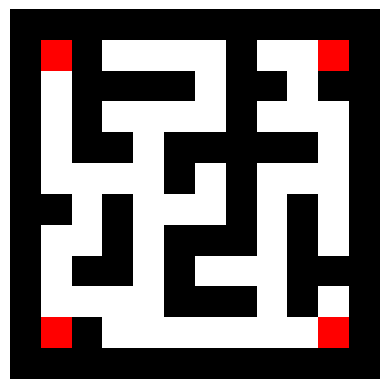

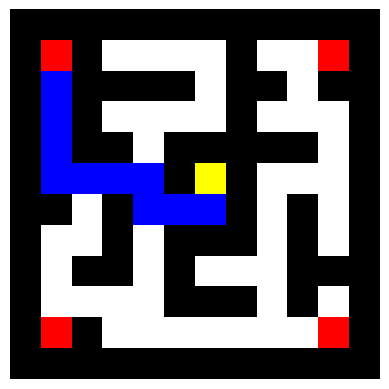

In [1]:
# Import module
from maze_visualizer import *

# Visualize a blank maze
show_maze(sample_maze)

# List storing valid path squares 
path = [[6, 6], [6, 5], [6, 4], [5, 4], [5, 3], [5, 2], [5, 1], [4, 1], [3, 1], [2, 1]]

# Visualize the searched maze
show_maze(sample_maze, start=(5, 6), path=path)

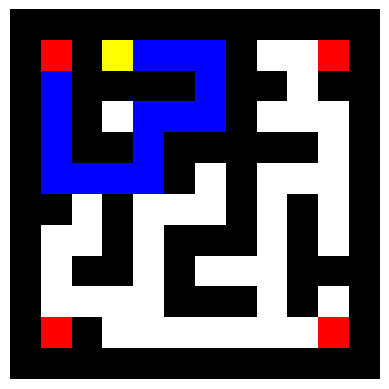

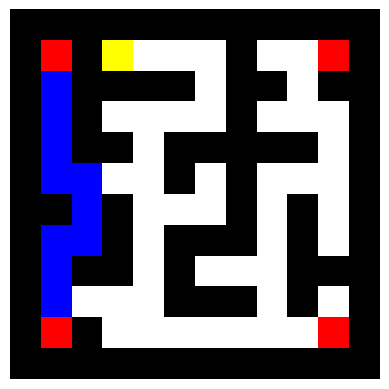

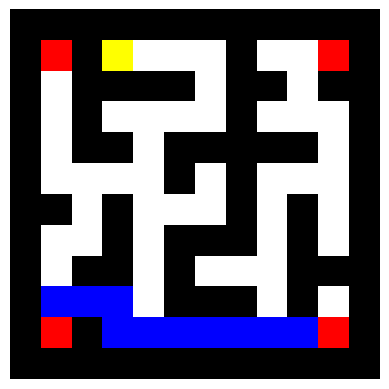

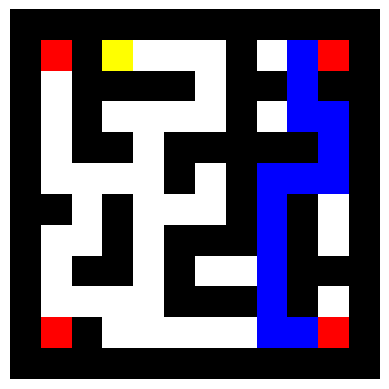

In [2]:
from collections import deque
from math import inf


def permutations(nums):
    if len(nums) == 1:
        return [nums]
    
    result = []
    for i in range(len(nums)):
        current_num = nums[i]
        remaining_nums = nums[:i] + nums[i+1:]
        sub_permutations = permutations(remaining_nums)
        for perm in sub_permutations:
            result.append([current_num] + perm)
    
    return result


def bfs(maze, start, end):
    # Define the four possible directions: up, down, left, right
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    # Initialize a queue for BFS
    queue = deque([(start, [start])])
    
    # Initialize a set to keep track of visited cells
    visited = set()
    
    # Mark the start cell as visited
    visited.add(start)
    
    # Perform BFS
    while queue:
        current_cell, path = queue.popleft()
        if current_cell == end:
            return path
        
        for direction in directions:
            new_cell = (current_cell[0] + direction[0], current_cell[1] + direction[1])
            if 0 <= new_cell[0] < len(maze) and 0 <= new_cell[1] < len(maze[0]) and maze[new_cell[0]][new_cell[1]] != 1 and new_cell not in visited:
                queue.append((new_cell, path + [new_cell]))
                visited.add(new_cell)
    
    return None


def bfs_full(maze, start):
    
    corners = [(1, 1), (1, len(maze[0]) - 2), (len(maze) - 2, 1), (len(maze) - 2, len(maze[0]) - 2)]
    
    # Generate all possible corner visiting sequences
    seq = list(permutations(corners))
    
    # Assume first path found is optimal
    min_path = []
    min_path.append(bfs(maze, start, seq[0][0]))
    for i in range(3):
        min_path.append(bfs(maze, seq[0][i], seq[0][i+1]))
    min_cost = sum([len(segment) for segment in min_path])
    
    # Find the path with minimum cost
    for i in range(1, len(seq)):
        path = []
        path.append(bfs(maze, start, seq[i][0]))
        for j in range(3):
            path.append(bfs(maze, seq[i][j], seq[i][j+1]))
        length = sum([len(segment) for segment in path])
        if length < min_cost:
            min_path = path
            min_cost = length
            
    return min_path


def show_solution(maze, start, path):
    for segment in path:
        show_maze(maze, start, segment)
    
        
# Breadth-first search
start = (1, 3)
show_solution(sample_maze, start, bfs_full(sample_maze, start))

In [8]:
import heapq

def heuristic_cost_estimate(start, goal):
    # Manhattan distance heuristic
    return abs(goal[0] - start[0]) + abs(goal[1] - start[1])

def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.insert(0, current)
    return total_path

def a_star_search(grid, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))  # (f_score, node)
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic_cost_estimate(start, goal)}

    while open_set:
        current_f, current = heapq.heappop(open_set)
        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor in neighbors(grid, current):
            tentative_g_score = g_score[current] + grid[neighbor[0]][neighbor[1]]
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic_cost_estimate(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None  # No path found

def neighbors(grid, cell):
    neighbors = []
    for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        x, y = cell[0] + dx, cell[1] + dy
        if 0 <= x < len(grid) and 0 <= y < len(grid[0]):
            neighbors.append((x, y))
    return neighbors

# Example usage
start = (1, 3)
goal = (9, 9)
path = a_star_search(sample_maze, start, goal)

show_maze(sample_maze, start, path)

[(1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (3, 6), (3, 7), (3, 8), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


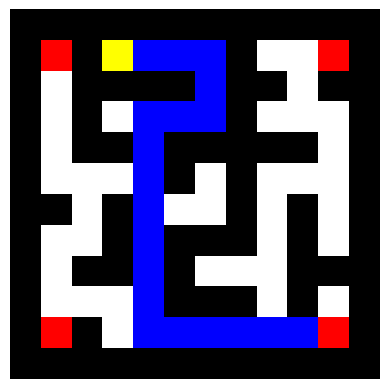

[(1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (3, 6), (3, 5), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10)]


In [12]:
import heapq

def heuristic_cost_estimate(start, goal):
    # Manhattan distance heuristic
    return abs(goal[0] - start[0]) + abs(goal[1] - start[1])

def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.insert(0, current)
    return total_path

def a_star_search(grid, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))  # (f_score, node)
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic_cost_estimate(start, goal)}

    while open_set:
        current_f, current = heapq.heappop(open_set)
        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor in neighbors(grid, current):
            tentative_g_score = g_score[current] + grid[neighbor[0]][neighbor[1]]
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic_cost_estimate(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None  # No path found

def neighbors(grid, cell):
    neighbors = []
    for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        x, y = cell[0] + dx, cell[1] + dy
        if 0 <= x < len(grid) and 0 <= y < len(grid[0]) and grid[x][y] != 1:
            neighbors.append((x, y))
    return neighbors

# Example usage
start = (1, 3)
goal = (10, 10)
path = a_star_search(sample_maze, start, goal)

show_maze(sample_maze, start, path)
print(path)
